<a href="https://colab.research.google.com/github/Fuad-Khan/2_Class_Religious_Abuse_Models/blob/main/Bi_LSTM_model_with_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# optimized version 7

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_5         │ (None, 100, 64)   │    768,000 │ input_layer_5[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_5     │ (None, 100, 128)  │     66,048 │ embedding_5[0][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 100, 128)  │          0 │ bidirectional_5[… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 100, 128)  │    131,968 │ dropout_11[0][0], │
│ (MultiHeadAttentio… │                   │            │ dropout_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 100, 128)  │          0 │ dropout_11[0][0], │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 100, 128)  │        256 │ add_4[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ layer_normalizat… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 64)        │      8,256 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 64)        │          0 │ dense_12[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 2)         │        130 │ dropout_13[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 974,658 (3.72 MB)

 Trainable params: 974,658 (3.72 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.6753 - loss: 0.6009 - val_accuracy: 0.8832 - val_loss: 0.3455 - learning_rate: 1.0000e-04
Epoch 2/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.8732 - loss: 0.3300 - val_accuracy: 0.8924 - val_loss: 0.2943 - learning_rate: 1.0000e-04
Epoch 3/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.9138 - loss: 0.2389 - val_accuracy: 0.9204 - val_loss: 0.2126 - learning_rate: 1.0000e-04
Epoch 4/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.9382 - loss: 0.1784 - val_accuracy: 0.9281 - val_loss: 0.1929 - learning_rate: 1.0000e-04
Epoch 5/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 200s 989ms/step - accuracy: 0.9510 - loss: 0.1450 - val_accuracy: 0.9324 - val_loss: 0.1771 - learning_rate: 1.0000e-04
Epoch 6/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.9682 - loss: 0.1070 - val_accuracy: 0.9329 - val_loss: 0.1689 - learning_rate: 1.0000e-04
Epoch 7/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - 

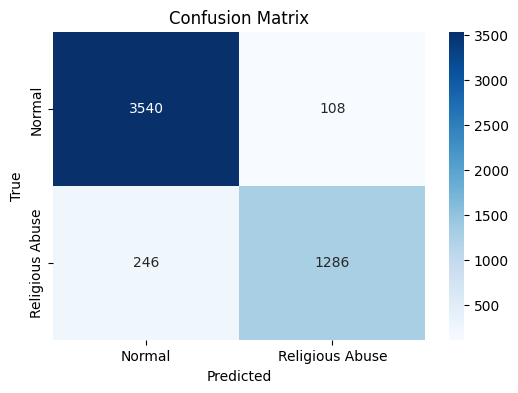

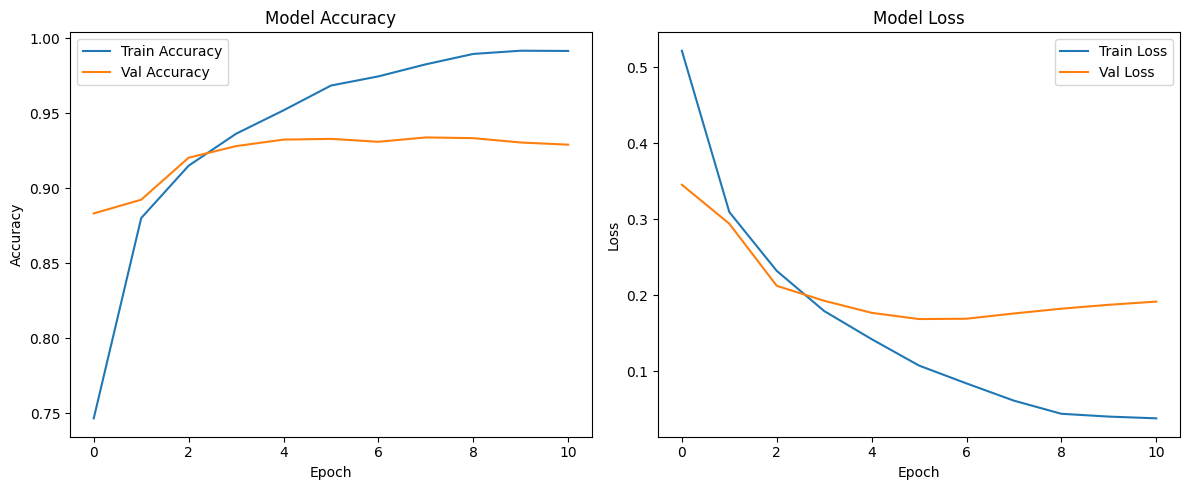

✅ Improved model saved with attention mechanism


In [ ]:
# Core libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.utils.class_weight import compute_class_weight

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Embedding, Bidirectional, LSTM, Dropout, Dense,
    LayerNormalization, GlobalMaxPooling1D, MultiHeadAttention,
    Concatenate
)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load dataset
file_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/2 Class/Cleaned_Labeled_Religious_Comments_Numeric.csv"
df = pd.read_csv(file_path)

# ✅ Filter for 2 labels only: 0 = Normal, 1 = Religious Abuse
df = df[df['label_numeric'].isin([0, 1])]
texts = df['comment'].astype(str).values
labels = df['label_numeric'].values

# ✅ Convert labels to one-hot encoding
labels_cat = to_categorical(labels, num_classes=2)

# ✅ Tokenize and pad
vocab_size = 12000
max_length = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=max_length, padding='post')

# ✅ Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(padded, labels_cat, test_size=0.2, random_state=42)

# ✅ Class weights for imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weights = dict(enumerate(class_weights))

# ✅ Fixed Bi-LSTM Model with Attention
def create_model():
    inputs = Input(shape=(max_length,))

    # Embedding layer (removed input_length as per warning)
    x = Embedding(vocab_size, 64)(inputs)

    # Bi-LSTM layer
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    x = Dropout(0.3)(x)

    # Multi-head attention (properly implemented)
    attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
    x = LayerNormalization()(x + attention_output)

    # Global pooling and dense layers
    x = GlobalMaxPooling1D()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.4)(x)

    outputs = Dense(2, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

model = create_model()

# ✅ Compile with lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

model.summary()

# ✅ Callbacks
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
]

# ✅ Train the model
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.1,
    class_weight=class_weights,
    callbacks=callbacks
)

# ✅ Evaluation
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=['Normal', 'Religious Abuse']))

# ✅ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Religious Abuse'],
            yticklabels=['Normal', 'Religious Abuse'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ✅ Plot Accuracy & Loss
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# ✅ Save model and tokenizer
model.save('/content/drive/MyDrive/Research Paper/Models/2 Class/BiLSTM + Attention model/bi-lstm_attention_improved_v7.h5')

with open('/content/drive/MyDrive/Research Paper/Models/2 Class/BiLSTM + Attention model/bi-lstm_attention_tokenizer_v7.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("✅ Improved model saved with attention mechanism")

# optimized version 9

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 100, 64)   │    768,000 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 100, 128)  │     66,048 │ embedding_1[0][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 100, 128)  │          0 │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 100, 128)  │    131,968 │ dropout_3[0][0],  │
│ (MultiHeadAttentio… │                   │            │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 100, 128)  │          0 │ dropout_3[0][0],  │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 100, 128)  │        256 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ layer_normalizat… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 64)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 2)         │        130 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 974,658 (3.72 MB)

 Trainable params: 974,658 (3.72 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
136/136 ━━━━━━━━━━━━━━━━━━━━ 133s 930ms/step - accuracy: 0.6054 - loss: 0.7257 - val_accuracy: 0.8297 - val_loss: 0.4489 - learning_rate: 1.0000e-04
Epoch 2/15
136/136 ━━━━━━━━━━━━━━━━━━━━ 127s 934ms/step - accuracy: 0.8496 - loss: 0.3809 - val_accuracy: 0.9011 - val_loss: 0.2659 - learning_rate: 1.0000e-04
Epoch 3/15
136/136 ━━━━━━━━━━━━━━━━━━━━ 142s 938ms/step - accuracy: 0.9102 - loss: 0.2405 - val_accuracy: 0.9275 - val_loss: 0.1913 - learning_rate: 1.0000e-04
Epoch 4/15
136/136 ━━━━━━━━━━━━━━━━━━━━ 125s 917ms/step - accuracy: 0.9439 - loss: 0.1629 - val_accuracy: 0.9369 - val_loss: 0.1692 - learning_rate: 1.0000e-04
Epoch 5/15
136/136 ━━━━━━━━━━━━━━━━━━━━ 147s 957ms/step - accuracy: 0.9668 - loss: 0.1144 - val_accuracy: 0.9405 - val_loss: 0.1612 - learning_rate: 1.0000e-04
Epoch 6/15
136/136 ━━━━━━━━━━━━━━━━━━━━ 137s 918ms/step - accuracy: 0.9809 - loss: 0.0797 - val_accuracy: 0.9425 - val_loss: 0.1481 - learning_rate: 1.0000e-04
Epoch 7/15
136/136 ━━━━━━━━━━━━━━━━━━━━ 

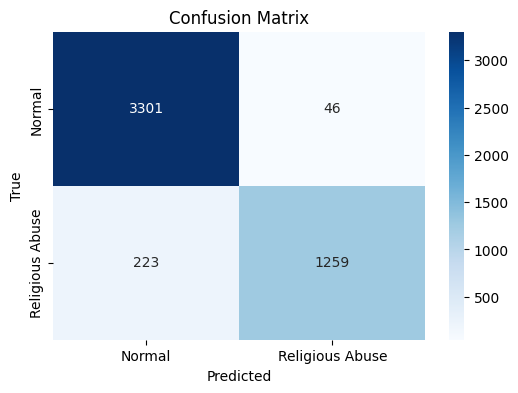

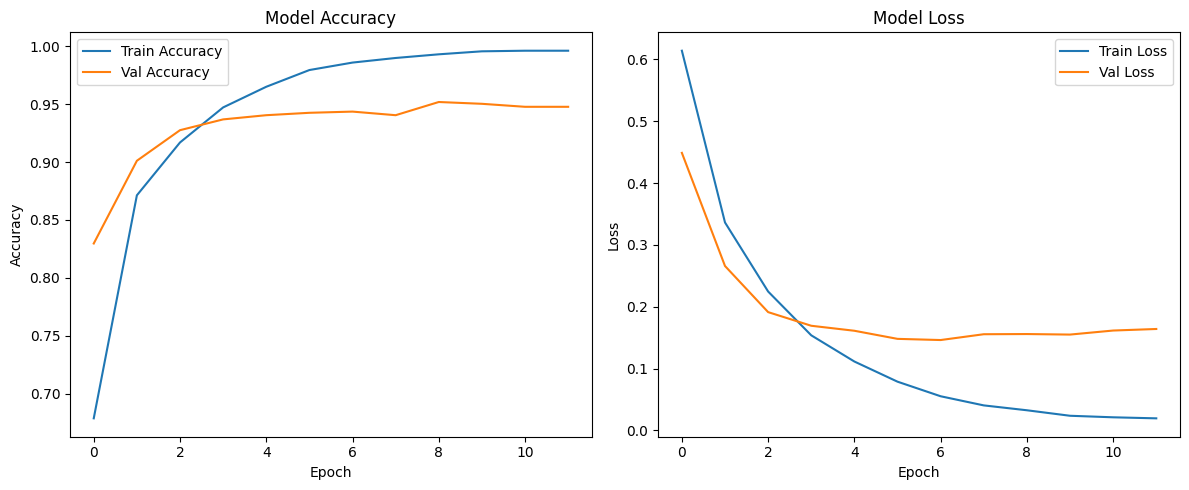

Saved artifact at '/content/drive/MyDrive/Research Paper/Models/2 Class/BiLSTM + Attention model/bi_lstm_attention_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100), dtype=tf.float32, name='keras_tensor_11')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  136452576989968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136452576989584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136452576993040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136452576993616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136452576992656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136452576994000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136452576994960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136452576994768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136452576995536: TensorSpec(shape=(), dtype=tf.resource, name=None)
 

In [ ]:
# Core libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.utils.class_weight import compute_class_weight

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Embedding, Bidirectional, LSTM, Dropout, Dense,
    LayerNormalization, GlobalMaxPooling1D, MultiHeadAttention
)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/2 Class/Cleaned_Labeled_Religious_Comments_Numeric_v4.csv"
df = pd.read_csv(file_path)

# Filter for 2 labels only: 0 = Normal, 1 = Religious Abuse
df = df[df['label_numeric'].isin([0, 1])]
texts = df['comment'].astype(str).values
labels = df['label_numeric'].values

# Convert labels to one-hot encoding
labels_cat = to_categorical(labels, num_classes=2)

# Tokenize and pad
vocab_size = 12000
max_length = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=max_length, padding='post')

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(padded, labels_cat, test_size=0.2, random_state=42)

# Class weights for imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weights = dict(enumerate(class_weights))

# Model creation function
def create_model():
    inputs = Input(shape=(max_length,))

    x = Embedding(vocab_size, 64)(inputs)
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    x = Dropout(0.3)(x)

    attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
    x = LayerNormalization()(x + attention_output)

    x = GlobalMaxPooling1D()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.4)(x)

    outputs = Dense(2, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

model = create_model()

# Compile model with lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

model.summary()

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
]

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.1,
    class_weight=class_weights,
    callbacks=callbacks
)

# Evaluation
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=['Normal', 'Religious Abuse']))

# Confusion matrix plot
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Religious Abuse'],
            yticklabels=['Normal', 'Religious Abuse'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot accuracy & loss
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save as TensorFlow SavedModel (folder)
model.export('/content/drive/MyDrive/Research Paper/Models/2 Class/BiLSTM + Attention model/bi_lstm_attention_savedmodel')
print("✅ Model exported as TensorFlow SavedModel format.")

# Save tokenizer
with open('/content/drive/MyDrive/Research Paper/Models/2 Class/BiLSTM + Attention model/bi-lstm_attention_tokenizer_v9.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("✅ Tokenizer saved.")

# Predict Sample Comment

In [ ]:
import numpy as np
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import TFSMLayer  # import TFSMLayer from keras.layers

# Load the model as TFSMLayer
model_path = '/content/drive/MyDrive/Research Paper/Models/2 Class/BiLSTM + Attention model/bi_lstm_attention_savedmodel'
model = TFSMLayer(model_path, call_endpoint='serving_default')

# Load tokenizer
tokenizer_path = "/content/drive/MyDrive/Research Paper/Models/2 Class/BiLSTM + Attention model/bi-lstm_attention_tokenizer_v9.pkl"
with open(tokenizer_path, 'rb') as handle:
    tokenizer = pickle.load(handle)

# Sample text
sample_text = "তোরা জঙ্গি হস কেনো"

# Tokenize & pad
sequence = tokenizer.texts_to_sequences([sample_text])
padded_sequence = pad_sequences(sequence, maxlen=100, padding='post')

# Predict (TFSMLayer expects float32)
padded_sequence = padded_sequence.astype('float32')
pred_dict = model(padded_sequence)  # returns dict, not tensor

# Extract tensor from dict (usually the key is 'output_0' or 'dense' or 'serving_default')
# Let's print keys to check:
print("Output keys:", pred_dict.keys())

# Example: get first output tensor by key
first_key = list(pred_dict.keys())[0]
pred = pred_dict[first_key].numpy()

pred_label = np.argmax(pred)

# Print results
label_names = ['Normal', 'Religious Abuse']
print("Input text:", sample_text)
print("Predicted label:", label_names[pred_label])
print("Probabilities:", pred[0])



Output keys: dict_keys(['output_0'])
Input text: তোরা জঙ্গি হস কেনো
Predicted label: Religious Abuse
Probabilities: [0.00778546 0.9922145 ]
